##Desafio 1 - Orion

Aluno: Kellysson Bruno Oliveira

##Objetivo:
Construir e testar um classificador com Python usando o conjunto de dados Iris.



##Etapas:

1.Carregue o dataset Iris usando scikit-learn.

2.Explore os dados (gr√°ficos, estat√≠sticas descritivas).

3.Divida em treino e teste (ex: 70/30).

4.Treine um classificador simples:

Sugest√£o: KNeighborsClassifier ou DecisionTreeClassifier.

5.Avalie o modelo (accuracy, confusion matrix).

6.Salve o c√≥digo no GitHub.

Extra (opcional):
Teste com outro classificador e compare.
Visualize a √°rvore de decis√£o ou os clusters.

In [2]:
## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

#importando Scikit learn dataset
from sklearn.datasets import load_iris

from sklearn import datasets

#dividindo dados em treino e teste
from sklearn.model_selection import train_test_split


# Importa√ß√µes de modelos de classifica√ß√£o B√°sicos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Importa√ß√µes de modelos de classifica√ß√£o mais sofisticados
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Importa√ß√µes dos par√¢metros para avalia√ß√£o dos modelos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Plotar gr√°ficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

print('Setup completo!')

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 6.2 MB/s eta 0:00:00
Setup completo!


# ETAPA 1 - Entendendo o dataset IRIS

In [3]:
#Abrindo o iris dataset

iris = datasets.load_iris()
#df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
#df_iris.head()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
## Verificar informacoes gerais sobre as variaveis do dataset iris
#Objetivo:verificar se existe informa√ß√£o faltante  e o tipo de dado presente no dataset

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Medidas de tendencia e dispers√£o
#Objetivo: compreender como est√£o distribu√≠dos os dados em termos de normalidade

df_iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

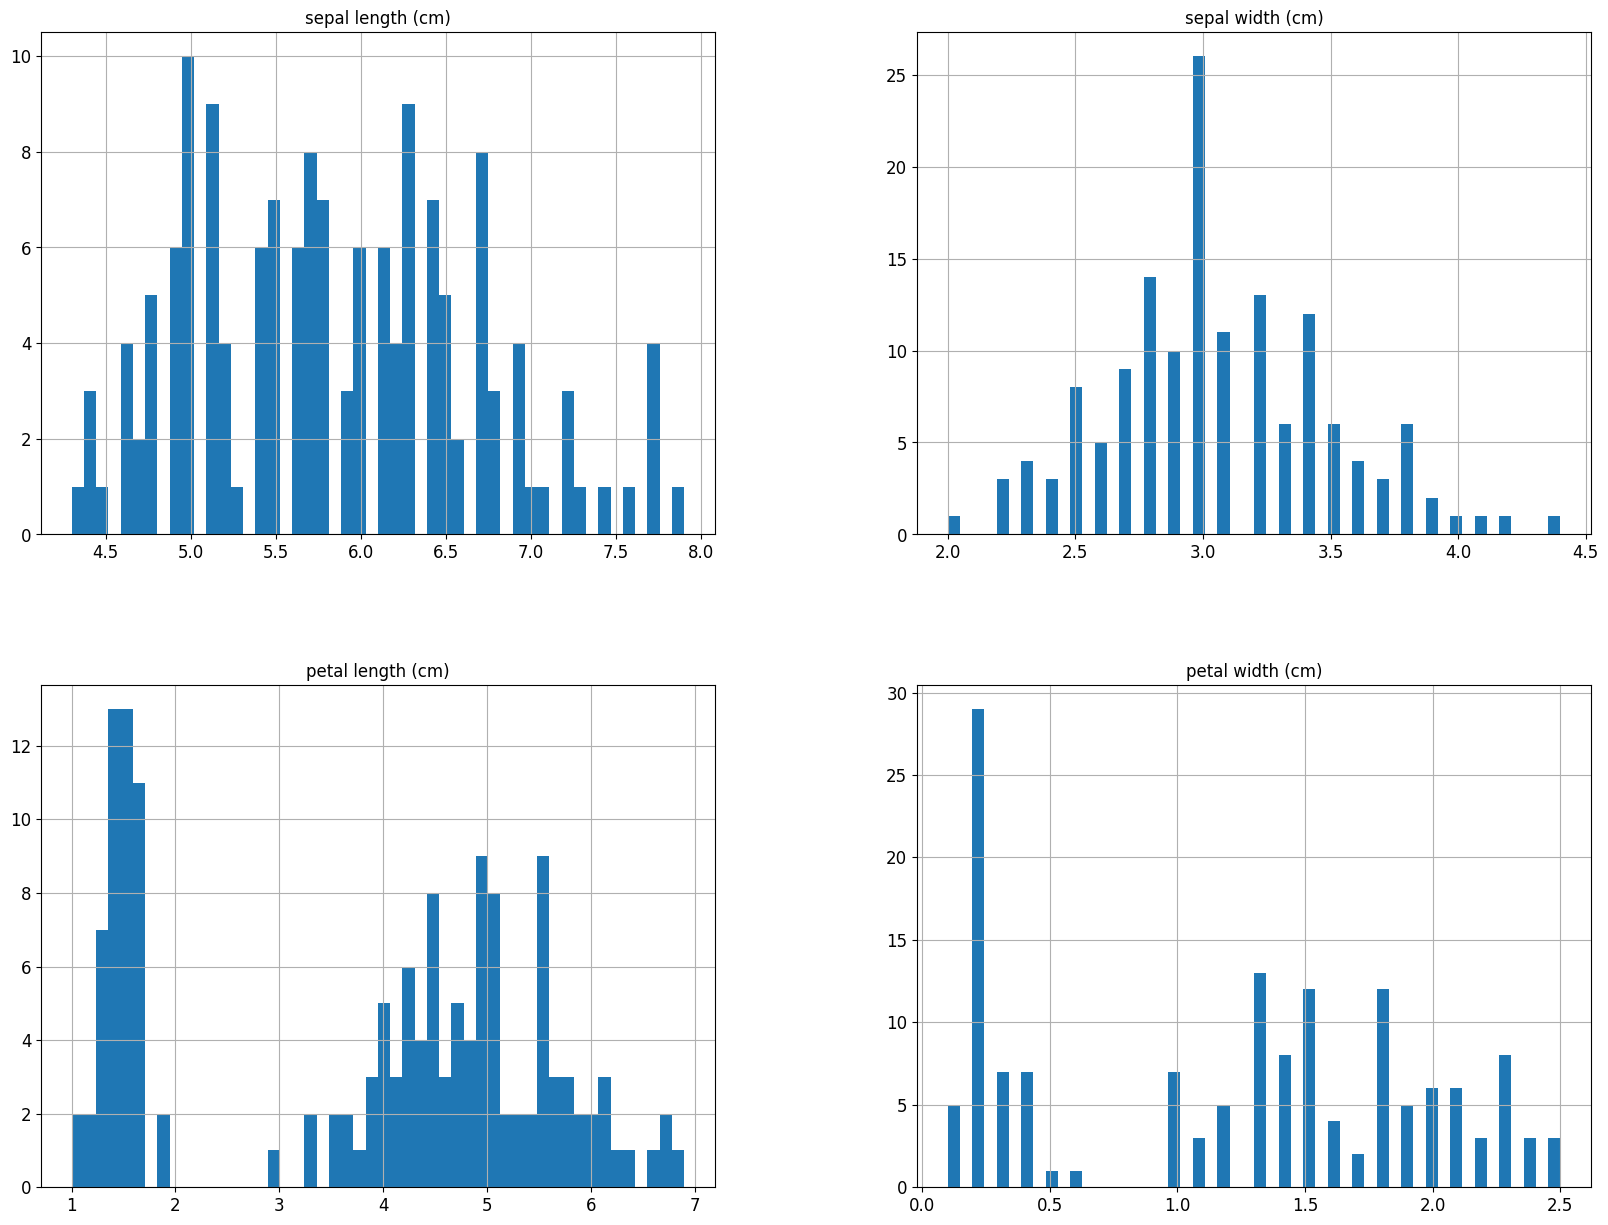

In [6]:
# Distribuicao das frequencias
# Forma de observar a normalidade dos dados de cada uma das vari√°veis presentes no dataset iris

df_iris.hist(bins=50, figsize=(20,15))
plt.show()

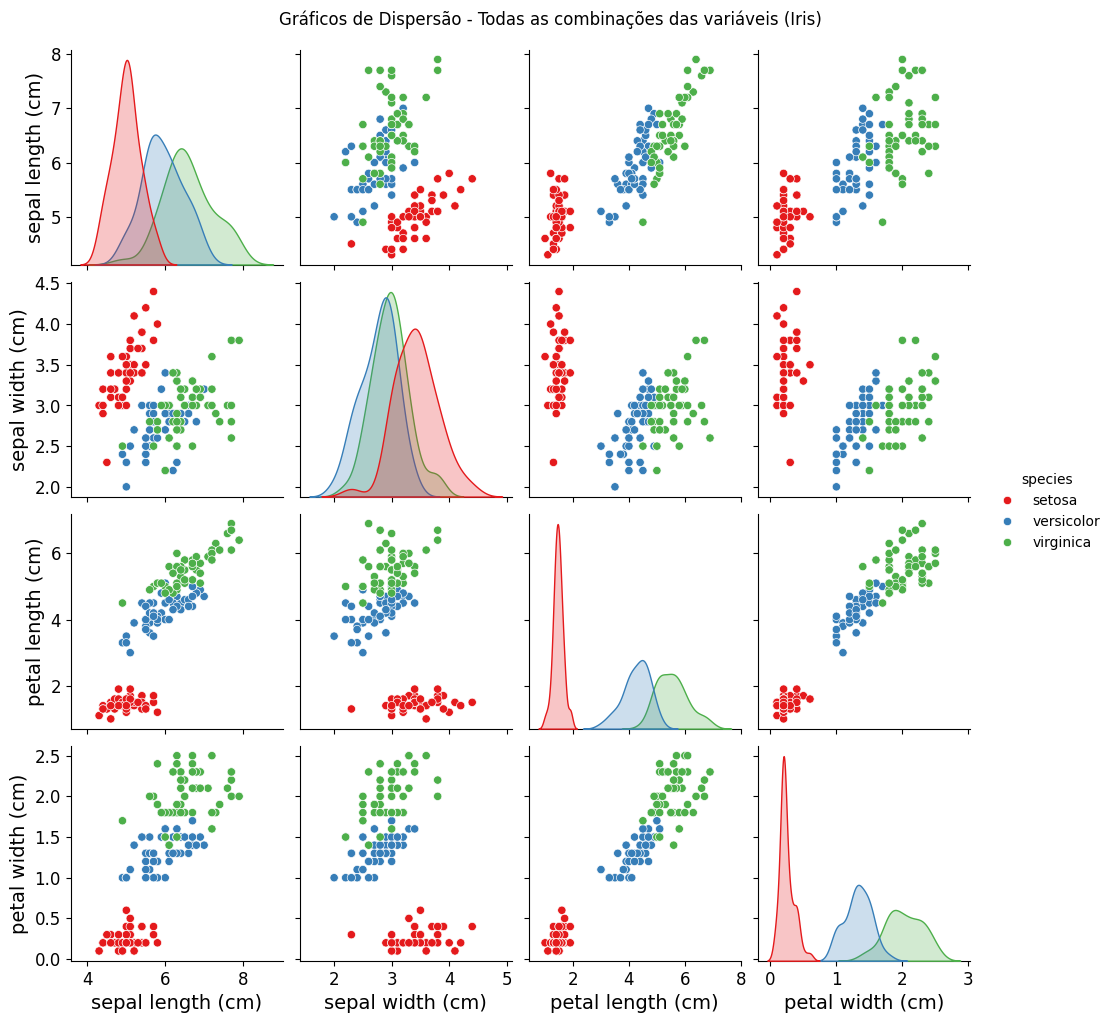

In [7]:
#Forma gr√°fica 1 de identificar as vari√°veis mais interessantes para a realiza√ß√£o da tarefa de classifica√ß√£o

# Carrega o dataset
iris = load_iris()

# Converte para DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Cria o pairplot
sns.pairplot(df_iris, hue='species', palette='Set1')

# Exibe o gr√°fico
plt.suptitle('Gr√°ficos de Dispers√£o - Todas as combina√ß√µes das vari√°veis (Iris)', y=1.02)
plt.show()

In [8]:
#Forma 2 de identificar as vari√°veis mais interessantes para a realiza√ß√£o da tarefa de classifica√ß√£o

# Matriz de correla√ß√£o
corr_matrix = df_iris.corr(numeric_only=True)
corr_matrix

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

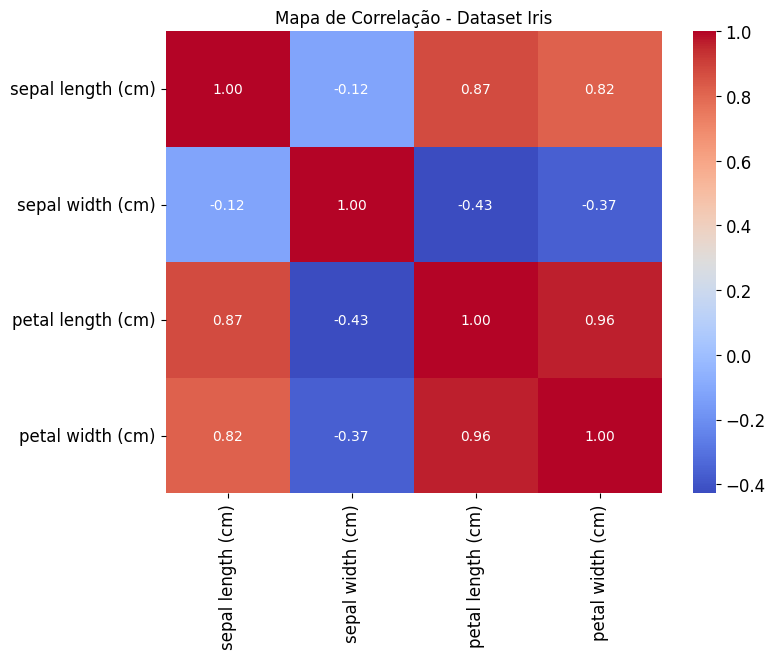

In [9]:
#Forma gr√°fica 2 de identificar as vari√°veis mais interessantes para a realiza√ß√£o da tarefa de classifica√ß√£o - via identifica√ß√£o visual da matriz de correla√ß√£o

# Gera o gr√°fico de correla√ß√£o (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correla√ß√£o - Dataset Iris')
plt.show()

# Etapa 2 - Construindo os modelos de classifica√ß√£o

Modelos de classifica√ß√£o B√°sicos

In [10]:
#dividindo dados em treino e teste
from sklearn.model_selection import train_test_split

# Define X (vari√°veis preditoras) e y (alvo/target)
X = iris.data              # Dados de entrada (4 vari√°veis -  2 de p√©talas e duas de s√©talas)
y = iris.target            # R√≥tulos (as 3 esp√©cies codificadas)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. SVC Linear


üìå Modelo: SVC Linear
üîπ Acur√°cia: 1.00


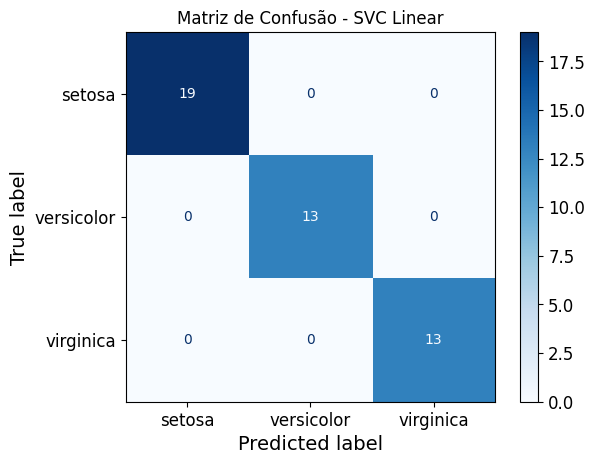

In [13]:
# SVC Linear
print("\nüìå Modelo: SVC Linear")
modelo_svc_linear = SVC(kernel='linear')
modelo_svc_linear.fit(X_train, y_train)
y_pred = modelo_svc_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - SVC Linear")
plt.show()


2. SVC RBF


üìå Modelo: SVC RBF
üîπ Acur√°cia: 1.00


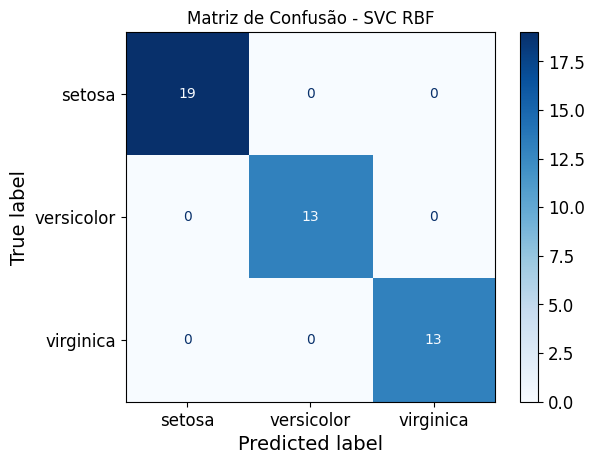

In [14]:
# SVC RBF
print("\nüìå Modelo: SVC RBF")
modelo_svc_rbf = SVC(kernel='rbf')
modelo_svc_rbf.fit(X_train, y_train)
y_pred = modelo_svc_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - SVC RBF")
plt.show()

3. KNN


üìå Modelo: KNN
üîπ Acur√°cia: 1.00


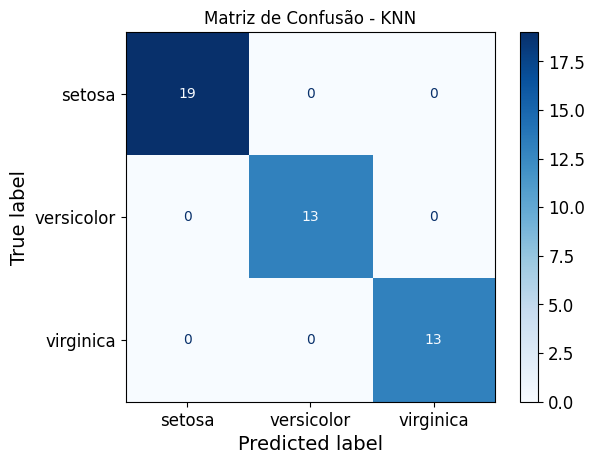

In [15]:
# KNN
print("\nüìå Modelo: KNN")
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - KNN")
plt.show()

4. Decision Tree


üìå Modelo: Decision Tree
üîπ Acur√°cia: 1.00


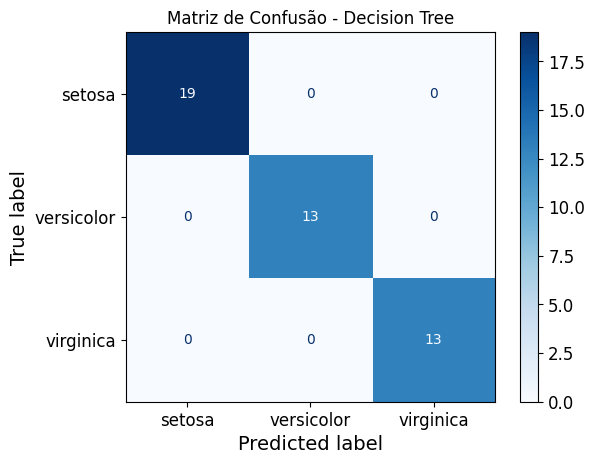

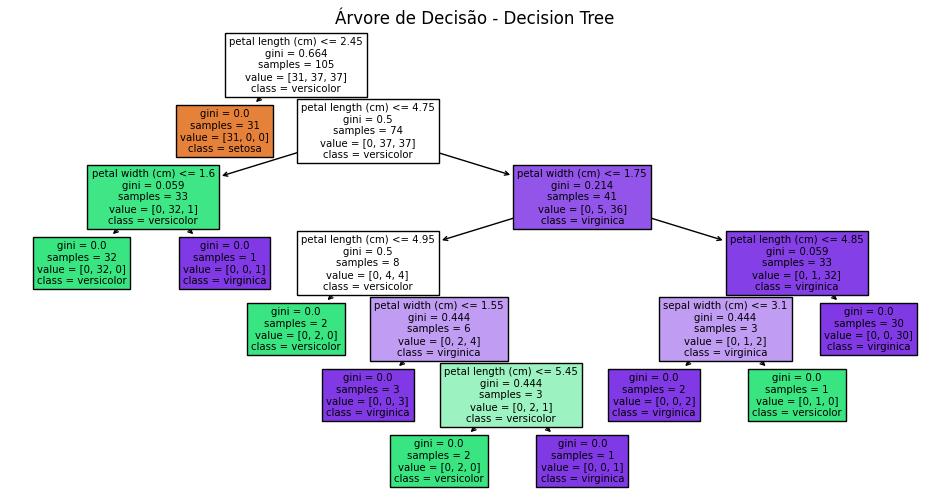

In [16]:
# Decision Tree
print("\nüìå Modelo: Decision Tree")
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred = modelo_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Decision Tree")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(modelo_tree, feature_names=iris.feature_names, class_names=target_names, filled=True)
plt.title("√Årvore de Decis√£o - Decision Tree")
plt.show()

5. Random Forest


üìå Modelo: Random Forest
üîπ Acur√°cia: 1.00


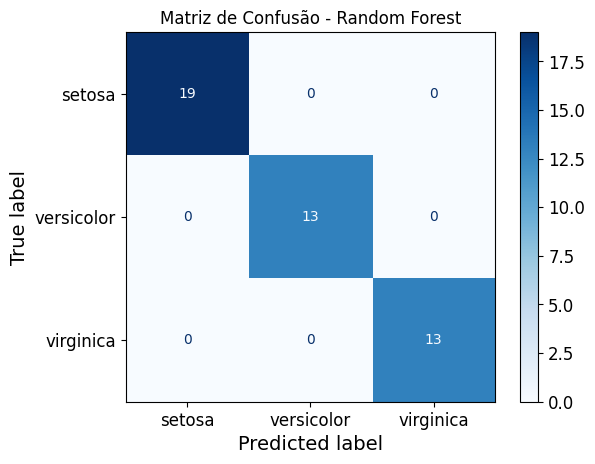

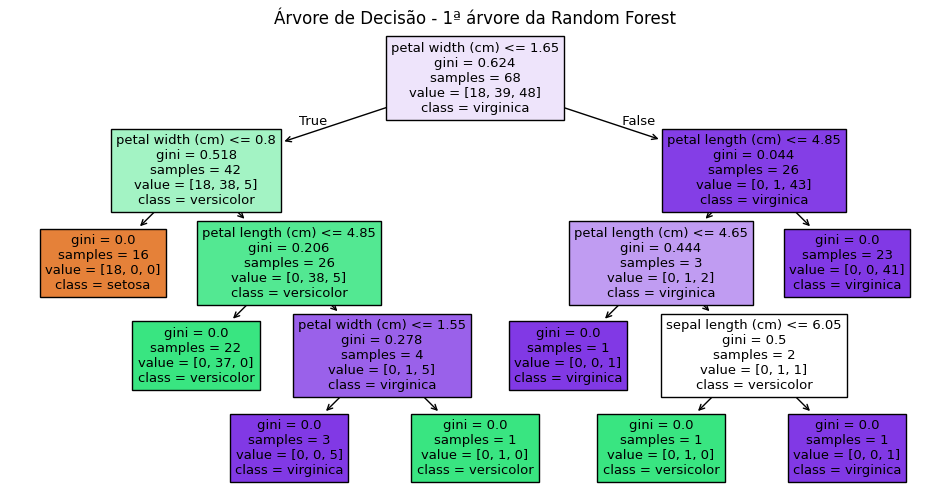

In [17]:
# Random Forest
print("\nüìå Modelo: Random Forest")
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Random Forest")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(modelo_rf.estimators_[0], feature_names=iris.feature_names, class_names=target_names, filled=True)
plt.title("√Årvore de Decis√£o - 1¬™ √°rvore da Random Forest")
plt.show()

6. Logistic Regression


üìå Modelo: Logistic Regression
üîπ Acur√°cia: 1.00


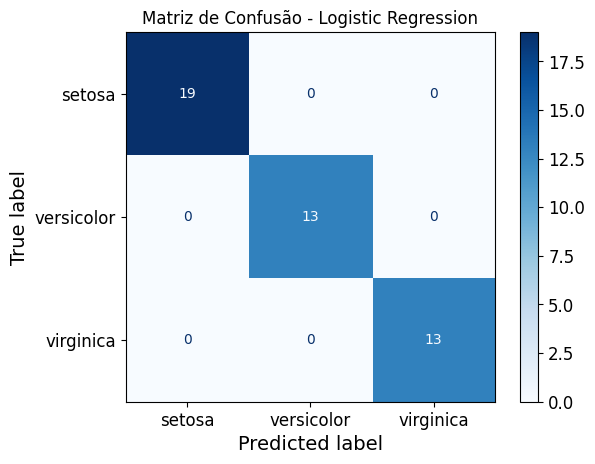

In [18]:
# Logistic Regression
print("\nüìå Modelo: Logistic Regression")
modelo_logreg = LogisticRegression(max_iter=200)
modelo_logreg.fit(X_train, y_train)
y_pred = modelo_logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Logistic Regression")
plt.show()

7. Naive Bayes


üìå Modelo: Naive Bayes
üîπ Acur√°cia: 0.98


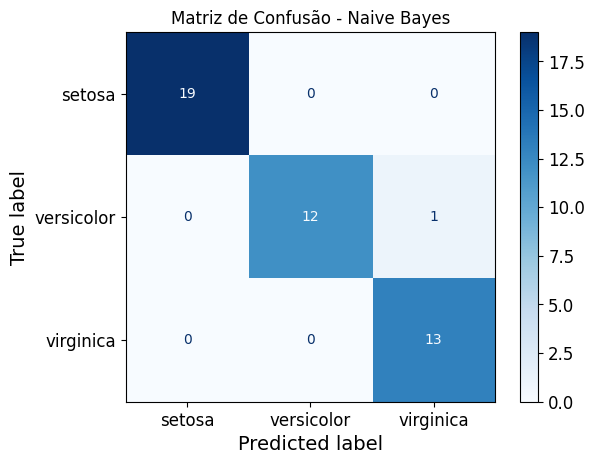

In [19]:
# Naive Bayes
print("\nüìå Modelo: Naive Bayes")
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred = modelo_nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Naive Bayes")
plt.show()

8. MLP Classifier


üìå Modelo: MLP Classifier
üîπ Acur√°cia: 1.00


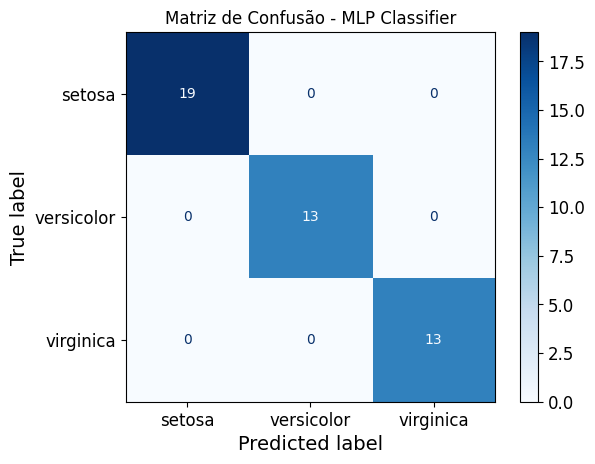

In [20]:
# MLP Classifier
print("\nüìå Modelo: MLP Classifier")
modelo_mlp = MLPClassifier(max_iter=1000)
modelo_mlp.fit(X_train, y_train)
y_pred = modelo_mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"üîπ Acur√°cia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - MLP Classifier")
plt.show()

Modelos de classifica√ß√£o mais sofisticados

1. Gradient Boosting

Gradient Boosting - Acur√°cia: 1.0


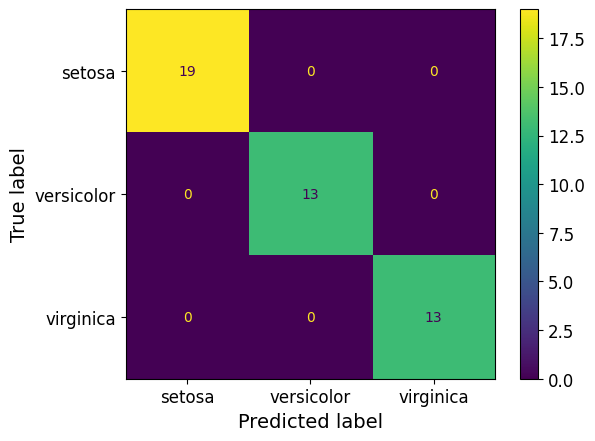

In [21]:
#Gradient Boosting

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

2. AdaBoost

AdaBoost - Acur√°cia: 1.0


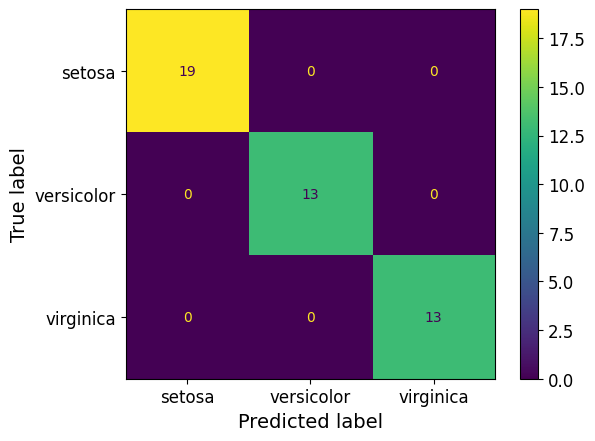

In [23]:
#AdaBoost

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("AdaBoost - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

3. XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Acur√°cia: 1.0


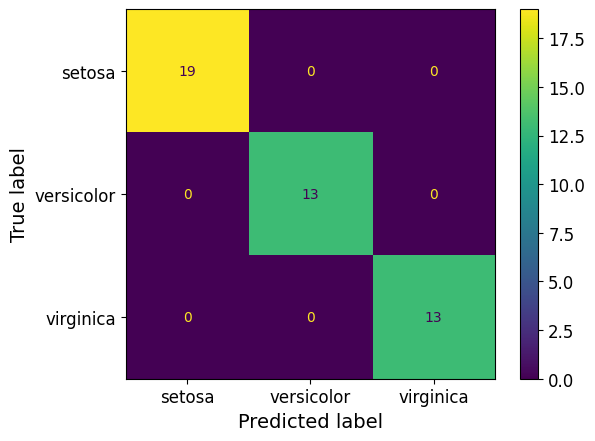

In [24]:
#XGBoost

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

 4. LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM - Acur√°cia: 1.0


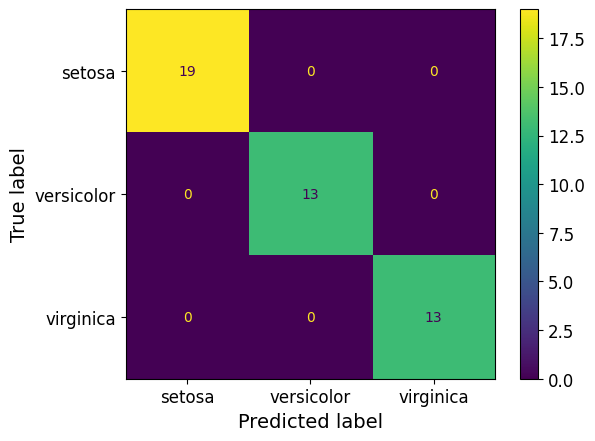

In [30]:
# LightGBM

model = LGBMClassifier(verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LightGBM - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

5. CatBoost

CatBoost - Acur√°cia: 1.0


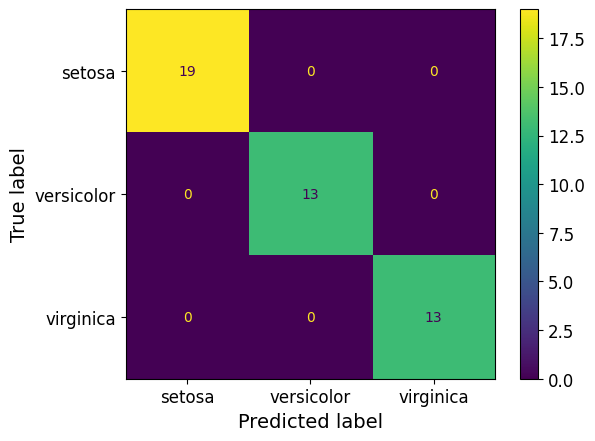

In [26]:
# CatBoost

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("CatBoost - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

6. Quadratic Discriminant Analysis (QDA)

QDA - Acur√°cia: 1.0


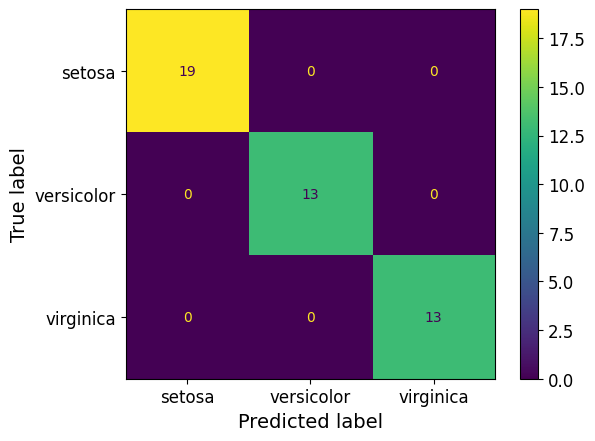

In [27]:
# Quadratic Discriminant Analysis (QDA)

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("QDA - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

 7. Linear Discriminant Analysis (LDA)

LDA - Acur√°cia: 1.0


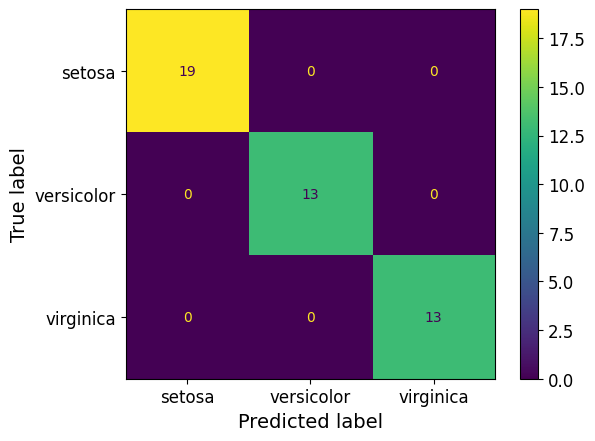

In [28]:
# Linear Discriminant Analysis (LDA)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LDA - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

8. Bagging Classifier

Bagging - Acur√°cia: 1.0


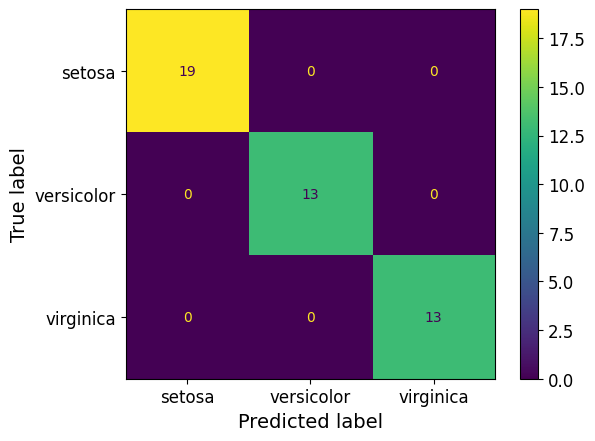

In [29]:
# Bagging Classifier

model = BaggingClassifier( n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bagging - Acur√°cia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

Conclus√£o:

Com exce√ß√£o do modelo Naive Bayes, que teve uma acur√°cia de 0.98; todos os outros modelos testados apresentaram uma acur√°cia de 100%. Acredita-se que esses resultados podem ser explicados devido as caracteristicas limitadas do dataset.